## **개요**

**목표:**</br>
행정구역별로 공공보건의료기관 수를 파악하고 인구수 대비 공공보건의료기관 비율을 비교 분석한다. 분석 결과는 블록맵으로 시각화한다.


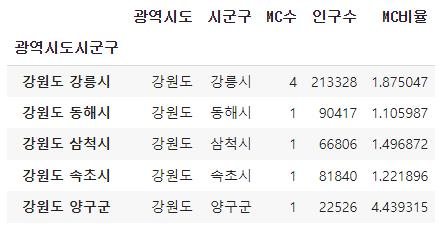

**데이터셋:**
*  전국 공공보건의료기관 현황 데이터: 공공데이터포털 사이트(https://www.data.go.kr/)
*  행정구역별 인구수 데이터: 국가통계포털 사이트(https://kosis.kr/)
*  행정구역 경계선 데이터: data_draw_korea.csv

**파이썬**

* **get()**: 딕셔너리 자료형에서 Key로 Value 얻기
*  **get(x, '디폴트 값')**

In [79]:
addr_abnorm = {'경기': '경기도', '경남': ' 경상남도', '경북': '경상북도', '충북': '충청북도', '서울시': '서울특별시', '대전시': '대전광역시', '충남':'충청남도', '전남':'전라남도', '전북':'전라북도'}

In [80]:
addr_abnorm.get('경기도')

In [81]:
addr_abnorm.get('경기도', '경기도')

'경기도'

**판다스(Pandas)**

*  **merge()**

*  **tolist()**: 데이터프레임/시리즈를 리스트로 변환

In [82]:
import pandas as pd

df = pd.DataFrame([[ 1, 2, 3, 4, 5.5, 6.7], [ 6, 7, 8, 4, 8.5, 8.7]])
df
listData = df.values.tolist()
listData

[[1.0, 2.0, 3.0, 4.0, 5.5, 6.7], [6.0, 7.0, 8.0, 4.0, 8.5, 8.7]]

*  **rename()**: 컬럼이름 변경

*  **sort_values(by=['열이름'], ascending=False)**: 데이터값(values) 정렬

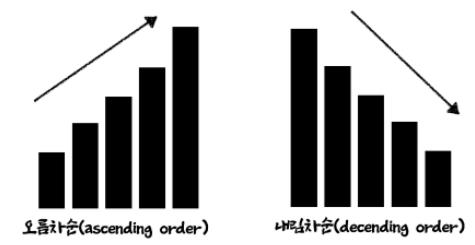

*  오름 차순: 점점 커지도록 정렬
*  내림 차순: 점점 작아지도록 정렬 

**[Review]**
*  **set_index("열이름")**
*  **split()**

In [83]:
v = '안녕하세요 박재완입니다'
v.split()[:1]

['안녕하세요']

*  **lambda 식**



## **행정구역별 데이터 분석 + 블록맵**

### **1) 공공보건의료기관현황 데이터 전처리**

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
file_path = '/content/drive/MyDrive/SSU_데이터 사이언스/Week11/'

In [7]:
publicM_df = pd.read_csv(file_path + '공공보건의료기관현황.csv', index_col = 0, encoding='EUC-KR')

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
#파일의 인코딩 타입 알아내는 법
"""import chardet
with open(file_path+'공공보건의료기관현황.csv',  'rb') as f:
  result = chardet.detect(f.readline())
  print(result['encoding'])"""

"import chardet\nwith open(file_path+'공공보건의료기관현황.csv',  'rb') as f:\n  result = chardet.detect(f.readline())\n  print(result['encoding'])"

**시군구별 공공보건의료기관 수 데이터 프레임 만들기**

In [10]:
"""def split_func(a):
  b= a.split()
  c= b[:2]
  return c

publicM_df['주소'].apply(split_func).tolist()"""

"def split_func(a):\n  b= a.split()\n  c= b[:2]\n  return c\n\npublicM_df['주소'].apply(split_func).tolist()"

In [11]:
pdf = publicM_df['주소'].apply(lambda v: v.split()[:2]).tolist()
pdf

[['강원도', '춘천시'],
 ['강원도', '삼척시'],
 ['강원도', '영월군'],
 ['강원도', '원주시'],
 ['강원도', '강릉시'],
 ['강원도', '속초시'],
 ['강원도', '춘천시'],
 ['강원도', '강릉시'],
 ['강원도', '정선군'],
 ['경기도', '수원시'],
 ['경기도', '이천시'],
 ['경기도', '안성시'],
 ['경기도', '의정부시'],
 ['경기도', '포천시'],
 ['경기도', '파주시'],
 ['경기도', '용인시'],
 ['경기도', '평택시'],
 ['경기도', '시흥시'],
 ['경기도', '여주시'],
 ['경기도', '남양주시'],
 ['경기도', '동두천시'],
 ['경기도', '용인시'],
 ['경기', '안산시'],
 ['경기도', '부천시'],
 ['경남', '통영시'],
 ['경남', '사천시'],
 ['경남', '사천시'],
 ['창원시', '의창구'],
 ['경남', '김해시'],
 ['경상남도', '양산시'],
 ['경상남도', '거창군'],
 ['창원시', '마산합포구3.15대로'],
 ['경상남도', '남해군'],
 ['경상남도', '창원시'],
 ['경상남도', '의령군'],
 ['경상북도', '포항시'],
 ['경상북도', '김천시'],
 ['경상북도', '안동시'],
 ['경상북도', '울진군'],
 ['경상북도', '포항시'],
 ['경상북도', '경주시'],
 ['경상북도', '김천시'],
 ['경상북도', '구미시'],
 ['경상북도', '안동시'],
 ['경상북도', '영주시'],
 ['경상북도', '상주시'],
 ['경상북도', '문경시'],
 ['경산시', '경안로'],
 ['경상북도', '의성군'],
 ['경북', '청도군'],
 ['경상북도', '고령군'],
 ['경상북도', '칠곡군'],
 ['경상북도', '봉화군'],
 ['경상북도', '울진군'],
 ['경상북도', '울릉군'],
 ['인천광역시', '부평구'],
 ['경기도', '안산시'],
 

In [12]:
addr = pd.DataFrame(pdf, columns = ['광역시도', '시군구'])
addr

,광역시도,시군구
0,강원도,춘천시
1,강원도,삼척시
2,강원도,영월군
3,강원도,원주시
4,강원도,강릉시
...,...,...
222,충청북도,제천시
223,충청북도,충주시
224,충청북도,충주시
225,충청북도,영동군


**행정구역 데이터 확인 및 수정**

*  **광역시도**

In [13]:
addr['광역시도'].unique()

array(['강원도', '경기도', '경기', '경남', '창원시', '경상남도', '경상북도', '경산시', '경북',
       '인천광역시', '대구광역시', '전라남도', '대전광역시', '광주광역시', '제주특별자치도', '부산광역시',
       '전라북도', '충북', '서울특별시', '서울시', '부산특별시', '대전시', '충남', '전남', '충청남도',
       '울산광역시', '전북', '천안시', '충청북도'], dtype=object)

In [14]:
addr[addr['광역시도']=='창원시']

,광역시도,시군구
27,창원시,의창구
31,창원시,마산합포구3.15대로


In [15]:
addr.loc[27] = ['경상남도', '창원시']
addr.loc[31] = ['경상남도', '창원시']

In [16]:
addr.loc[27], addr.loc[31]

(광역시도    경상남도
 시군구      창원시
 Name: 27, dtype: object, 광역시도    경상남도
 시군구      창원시
 Name: 31, dtype: object)

In [17]:
addr[addr['광역시도']=='경산시']

,광역시도,시군구
47,경산시,경안로


In [18]:
addr.loc[47] = ['경상북도', '경산시']

In [19]:
addr[addr['광역시도']=='천안시']

,광역시도,시군구
209,천안시,동남구
210,천안시,동남구


In [20]:
addr.loc[209] = ['충청남도', '천안시']
addr.loc[210] = ['충청남도', '천안시']

*  **get() 메소드를 이용한 데이터 전처리 방법**

In [21]:
addr['광역시도'].unique()

array(['강원도', '경기도', '경기', '경남', '경상남도', '경상북도', '경북', '인천광역시', '대구광역시',
       '전라남도', '대전광역시', '광주광역시', '제주특별자치도', '부산광역시', '전라북도', '충북',
       '서울특별시', '서울시', '부산특별시', '대전시', '충남', '전남', '충청남도', '울산광역시', '전북',
       '충청북도'], dtype=object)

In [22]:
addr_abnorm = {'경기': '경기도', '경남': ' 경상남도', '경북': '경상북도', '충북': '충청북도', '서울시': '서울특별시', '대전시': '대전광역시', '충남':'충청남도', '전남':'전라남도', '전북':'전라북도', '부산특별시':'부산광역시'}

In [23]:
#addr_abnorm.get('경상북도', '경상')

In [24]:
#def addr_fix(v):
#  a = addr_abnorm.get(v, v)
#  return a

In [25]:
#addr['광역시도'].apply(addr_fix)

In [26]:
addr['광역시도']=addr['광역시도'].apply(lambda v: addr_abnorm.get(v, v))

In [27]:
addr['광역시도'].unique()

array(['강원도', '경기도', ' 경상남도', '경상남도', '경상북도', '인천광역시', '대구광역시', '전라남도',
       '대전광역시', '광주광역시', '제주특별자치도', '부산광역시', '전라북도', '충청북도', '서울특별시',
       '충청남도', '울산광역시'], dtype=object)

*  **시군구**

In [28]:
addr['시군구'].unique()

array(['춘천시', '삼척시', '영월군', '원주시', '강릉시', '속초시', '정선군', '수원시', '이천시',
       '안성시', '의정부시', '포천시', '파주시', '용인시', '평택시', '시흥시', '여주시', '남양주시',
       '동두천시', '안산시', '부천시', '통영시', '사천시', '창원시', '김해시', '양산시', '거창군',
       '남해군', '의령군', '포항시', '김천시', '안동시', '울진군', '경주시', '구미시', '영주시',
       '상주시', '문경시', '경산시', '의성군', '청도군', '고령군', '칠곡군', '봉화군', '울릉군',
       '부평구', '북구', '순천시', '대덕구', '태백시', '동해시', '화성시', '광산구', '남구', '중구',
       '아란13길', '서구', '전주시', '진주시', '청주시', '종로구', '성남시', '동구', '화순군',
       '강동구', '사상구', '달서구', '해운대구', '유성구', '가평군', '양주시', '고양시', '홍천군',
       '양구군', '청원군', '계룡시', '논산시', '함평군', '양평군', '수성구', '달성군', '연수구',
       '노원구', '기장군', '공주시', '강북구', '광진구', '나주시', '창녕군', '목포시', '고흥군',
       '연제구', '동매로', '서초구', '은평구', '중랑구', '강남구', '동작구', '동대문구', '양천구',
       '성동구', '송파구', '울주군', '계양구', '옹진군', '보성군', '광양시', '영광군', '무안군',
       '진도군', '강진군', '곡성군', '여수시', '신안군', '장성군', '완주군', '부안군', '정읍시',
       '남원시', '군산시', '고창군', '진안군', '제주시', '서귀포시', '천안시', '보령시', '서산시',
       '서천

In [29]:
addr[addr['시군구']=='아란13길']

,광역시도,시군구
75,제주특별자치도,아란13길


In [30]:
addr.loc[75] = ['제주특별자치도', '제주시']

In [31]:
addr.loc[75]

광역시도    제주특별자치도
시군구         제주시
Name: 75, dtype: object

In [32]:
addr[addr['시군구']=='동매로']

,광역시도,시군구
155,부산광역시,동매로


In [33]:
addr.loc[155] =  ['부산광역시', '사하구']

In [34]:
addr.loc[155]

광역시도    부산광역시
시군구       사하구
Name: 155, dtype: object

In [35]:
for n in range(len(addr)):
   addr['광역시도'][n] = addr['광역시도'][n].strip()

In [36]:
for n in range(len(addr)):
   addr['시군구'][n] = addr['시군구'][n].strip()

*  **행정구역별 공공보건의료기관의 수 구하기**

In [37]:
addr['광역시도시군구'] = addr['광역시도']+' '+ addr['시군구']
addr

,광역시도,시군구,광역시도시군구
0,강원도,춘천시,강원도 춘천시
1,강원도,삼척시,강원도 삼척시
2,강원도,영월군,강원도 영월군
3,강원도,원주시,강원도 원주시
4,강원도,강릉시,강원도 강릉시
...,...,...,...
222,충청북도,제천시,충청북도 제천시
223,충청북도,충주시,충청북도 충주시
224,충청북도,충주시,충청북도 충주시
225,충청북도,영동군,충청북도 영동군


In [38]:
addr['MC수'] = 0
addr

,광역시도,시군구,광역시도시군구,MC수
0,강원도,춘천시,강원도 춘천시,0
1,강원도,삼척시,강원도 삼척시,0
2,강원도,영월군,강원도 영월군,0
3,강원도,원주시,강원도 원주시,0
4,강원도,강릉시,강원도 강릉시,0
...,...,...,...,...
222,충청북도,제천시,충청북도 제천시,0
223,충청북도,충주시,충청북도 충주시,0
224,충청북도,충주시,충청북도 충주시,0
225,충청북도,영동군,충청북도 영동군,0


In [39]:
addr.groupby(['광역시도', '시군구', '광역시도시군구'], as_index=False)[['MC수']].count()

,광역시도,시군구,광역시도시군구,MC수
0,강원도,강릉시,강원도 강릉시,4
1,강원도,동해시,강원도 동해시,1
2,강원도,삼척시,강원도 삼척시,1
3,강원도,속초시,강원도 속초시,1
4,강원도,양구군,강원도 양구군,1
...,...,...,...,...
135,충청북도,영동군,충청북도 영동군,1
136,충청북도,제천시,충청북도 제천시,1
137,충청북도,청원군,충청북도 청원군,1
138,충청북도,청주시,충청북도 청주시,4


In [40]:
addr_df = addr.groupby(['광역시도', '시군구', '광역시도시군구'], as_index = False).count()
addr_df

,광역시도,시군구,광역시도시군구,MC수
0,강원도,강릉시,강원도 강릉시,4
1,강원도,동해시,강원도 동해시,1
2,강원도,삼척시,강원도 삼척시,1
3,강원도,속초시,강원도 속초시,1
4,강원도,양구군,강원도 양구군,1
...,...,...,...,...
135,충청북도,영동군,충청북도 영동군,1
136,충청북도,제천시,충청북도 제천시,1
137,충청북도,청원군,충청북도 청원군,1
138,충청북도,청주시,충청북도 청주시,4


In [41]:
addr_df[addr_df['광역시도시군구']=="경상남도 김해시"]

,광역시도,시군구,광역시도시군구,MC수
32,경상남도,김해시,경상남도 김해시,1


In [42]:
setIndex_addr_df = addr_df.set_index('광역시도시군구')

In [43]:
setIndex_addr_df

,광역시도,시군구,MC수
광역시도시군구,,,
강원도 강릉시,강원도,강릉시,4
강원도 동해시,강원도,동해시,1
강원도 삼척시,강원도,삼척시,1
강원도 속초시,강원도,속초시,1
강원도 양구군,강원도,양구군,1
...,...,...,...
충청북도 영동군,충청북도,영동군,1
충청북도 제천시,충청북도,제천시,1
충청북도 청원군,충청북도,청원군,1


### **2) 행정구역별 인구수 데이터 전처리**

In [44]:
pop_df = pd.read_excel(file_path+'행정구역_시군구_별__성별_인구수_2.xlsx')
pop_df

,행정구역(시군구)별(1),행정구역(시군구)별(2),총인구수 (명),남자인구수 (명),여자인구수 (명)
0,전국,소계,51847509,25862863,25984646
1,서울특별시,소계,9733509,4745088,4988421
2,서울특별시,종로구,151215,73688,77527
3,서울특별시,중구,126201,61946,64255
4,서울특별시,용산구,229385,110701,118684
...,...,...,...,...,...
274,경상남도,거창군,62049,30275,31774
275,경상남도,합천군,45054,21590,23464
276,제주특별자치도,소계,670749,337231,333518
277,제주특별자치도,제주시,489202,245389,243813


In [45]:
pop_df = pop_df.rename(columns = {'행정구역(시군구)별(1)':'광역시도', '행정구역(시군구)별(2)':'시군구'})
pop_df

,광역시도,시군구,총인구수 (명),남자인구수 (명),여자인구수 (명)
0,전국,소계,51847509,25862863,25984646
1,서울특별시,소계,9733509,4745088,4988421
2,서울특별시,종로구,151215,73688,77527
3,서울특별시,중구,126201,61946,64255
4,서울특별시,용산구,229385,110701,118684
...,...,...,...,...,...
274,경상남도,거창군,62049,30275,31774
275,경상남도,합천군,45054,21590,23464
276,제주특별자치도,소계,670749,337231,333518
277,제주특별자치도,제주시,489202,245389,243813


In [46]:
for n in range(len(pop_df)):
   pop_df['광역시도'][n] = pop_df['광역시도'][n].strip()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [47]:
for n in range(len(pop_df)):
   pop_df['시군구'][n] = pop_df['시군구'][n].strip()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [48]:
pop_df[pop_df['시군구']=='서원구']

,광역시도,시군구,총인구수 (명),남자인구수 (명),여자인구수 (명)
154,충청북도,서원구,202513,100492,102021


In [49]:
pop_df['시군구'].loc[154] = '서원군'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [50]:
pop_df['시군구'].loc[154]

'서원군'

In [51]:
pop_df[pop_df['시군구']=='청원구']

,광역시도,시군구,총인구수 (명),남자인구수 (명),여자인구수 (명)
155,충청북도,청원구,195404,100038,95366


In [52]:
pop_df['시군구'].loc[155]='청원군'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [53]:
pop_df['시군구'].loc[155]

'청원군'

In [54]:
pop_df[pop_df['시군구']=='상당구']

,광역시도,시군구,총인구수 (명),남자인구수 (명),여자인구수 (명)
156,충청북도,상당구,179626,89423,90203


In [55]:
pop_df['시군구'].loc[156] = '상당군'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [56]:
pop_df['시군구'].loc[156]

'상당군'

In [57]:
pop_df[pop_df['시군구']=='흥덕구']

,광역시도,시군구,총인구수 (명),남자인구수 (명),여자인구수 (명)
157,충청북도,흥덕구,262504,133146,129358


In [58]:
pop_df['시군구'].loc[157] = '흥덕군'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [59]:
pop_df['시군구'].loc[157]

'흥덕군'

In [60]:
pop_df['광역시도시군구'] = pop_df['광역시도']+' '+ pop_df['시군구']
pop_df

,광역시도,시군구,총인구수 (명),남자인구수 (명),여자인구수 (명),광역시도시군구
0,전국,소계,51847509,25862863,25984646,전국 소계
1,서울특별시,소계,9733509,4745088,4988421,서울특별시 소계
2,서울특별시,종로구,151215,73688,77527,서울특별시 종로구
3,서울특별시,중구,126201,61946,64255,서울특별시 중구
4,서울특별시,용산구,229385,110701,118684,서울특별시 용산구
...,...,...,...,...,...,...
274,경상남도,거창군,62049,30275,31774,경상남도 거창군
275,경상남도,합천군,45054,21590,23464,경상남도 합천군
276,제주특별자치도,소계,670749,337231,333518,제주특별자치도 소계
277,제주특별자치도,제주시,489202,245389,243813,제주특별자치도 제주시


In [61]:
pop_df = pop_df[pop_df['시군구'] != '소계']

In [62]:
setIndex_pop_df = pop_df.set_index('광역시도시군구')

In [63]:
addr_pop_df = pd.merge(setIndex_addr_df, setIndex_pop_df, how ='left', left_index = True, right_index = True)
addr_pop_df

,광역시도_x,시군구_x,MC수,광역시도_y,시군구_y,총인구수 (명),남자인구수 (명),여자인구수 (명)
광역시도시군구,,,,,,,,
강원도 강릉시,강원도,강릉시,4,강원도,강릉시,213328,105775,107553
강원도 동해시,강원도,동해시,1,강원도,동해시,90417,45782,44635
강원도 삼척시,강원도,삼척시,1,강원도,삼척시,66806,33811,32995
강원도 속초시,강원도,속초시,1,강원도,속초시,81840,40470,41370
강원도 양구군,강원도,양구군,1,강원도,양구군,22526,11937,10589
...,...,...,...,...,...,...,...,...
충청북도 영동군,충청북도,영동군,1,충청북도,영동군,48523,24060,24463
충청북도 제천시,충청북도,제천시,1,충청북도,제천시,134359,67326,67033
충청북도 청원군,충청북도,청원군,1,충청북도,청원군,195404,100038,95366


In [64]:
addr_pop_df.isnull().sum()

광역시도_x       0
시군구_x        0
MC수          0
광역시도_y       0
시군구_y        0
총인구수 (명)     0
남자인구수 (명)    0
여자인구수 (명)    0
dtype: int64

In [65]:
addr_pop_df[addr_pop_df['시군구_y'].isnull()]

,광역시도_x,시군구_x,MC수,광역시도_y,시군구_y,총인구수 (명),남자인구수 (명),여자인구수 (명)
광역시도시군구,,,,,,,,


In [66]:
ratio_df = addr_pop_df[['광역시도_x',	'시군구_x',	'MC수',	'총인구수 (명)']]

In [67]:
ratio_df['MC비율'] = ratio_df['MC수']/ratio_df['총인구수 (명)']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [68]:
ratio_df

,광역시도_x,시군구_x,MC수,총인구수 (명),MC비율
광역시도시군구,,,,,
강원도 강릉시,강원도,강릉시,4,213328,0.000019
강원도 동해시,강원도,동해시,1,90417,0.000011
강원도 삼척시,강원도,삼척시,1,66806,0.000015
강원도 속초시,강원도,속초시,1,81840,0.000012
강원도 양구군,강원도,양구군,1,22526,0.000044
...,...,...,...,...,...
충청북도 영동군,충청북도,영동군,1,48523,0.000021
충청북도 제천시,충청북도,제천시,1,134359,0.000007
충청북도 청원군,충청북도,청원군,1,195404,0.000005


In [69]:
ratio_df['MC비율'] = ratio_df['MC비율']*100000

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [70]:
ratio_df = ratio_df.rename(columns={'광역시도_x':'광역시도', '시군구_x':'시군구', '총인구수 (명)':'인구수'})

In [71]:
ratio_df.head()

,광역시도,시군구,MC수,인구수,MC비율
광역시도시군구,,,,,
강원도 강릉시,강원도,강릉시,4,213328,1.875047
강원도 동해시,강원도,동해시,1,90417,1.105987
강원도 삼척시,강원도,삼척시,1,66806,1.496872
강원도 속초시,강원도,속초시,1,81840,1.221896
강원도 양구군,강원도,양구군,1,22526,4.439315


In [72]:
ratio_df = ratio_df.sort_values(by=['MC비율'],  ascending=False)

In [73]:
ratio_df

,광역시도,시군구,MC수,인구수,MC비율
광역시도시군구,,,,,
경상북도 울릉군,경상북도,울릉군,1,9521,10.503098
전라남도 함평군,전라남도,함평군,2,32785,6.100351
강원도 정선군,강원도,정선군,2,37194,5.377211
인천광역시 옹진군,인천광역시,옹진군,1,20486,4.881382
강원도 양구군,강원도,양구군,1,22526,4.439315
...,...,...,...,...,...
대구광역시 달서구,대구광역시,달서구,1,568663,0.175851
서울특별시 송파구,서울특별시,송파구,1,676341,0.147854
경기도 화성시,경기도,화성시,1,818760,0.122136


### **시각화**

*  **plot()**
*  **bar()**
*  **pcolor()**: 2차원 행렬의 요소를 색상으로 표현
*  **text()**: https://matplotlib.org/3.5.0/api/text_api.html#matplotlib.text.Text


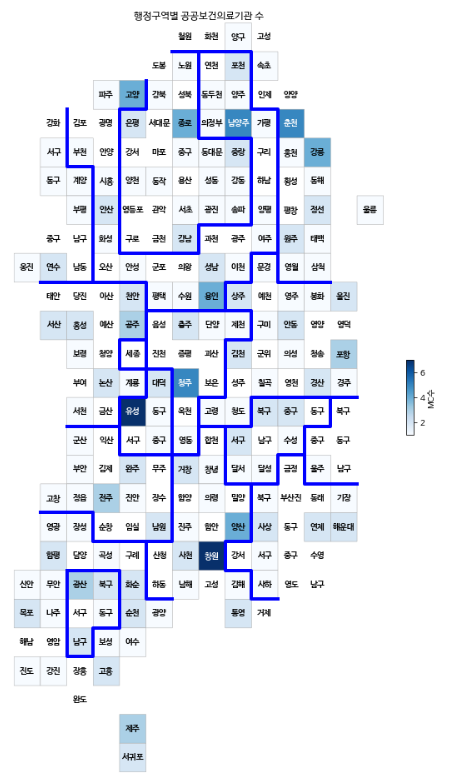

*  **pivot(index, columns, values)**: 
   데이터 열 중에서 두 개의 열을 각각 행 인덱스, 열 인덱스로 사용하여 데이터를 조회하여 펼쳐놓은 것을 말한다.

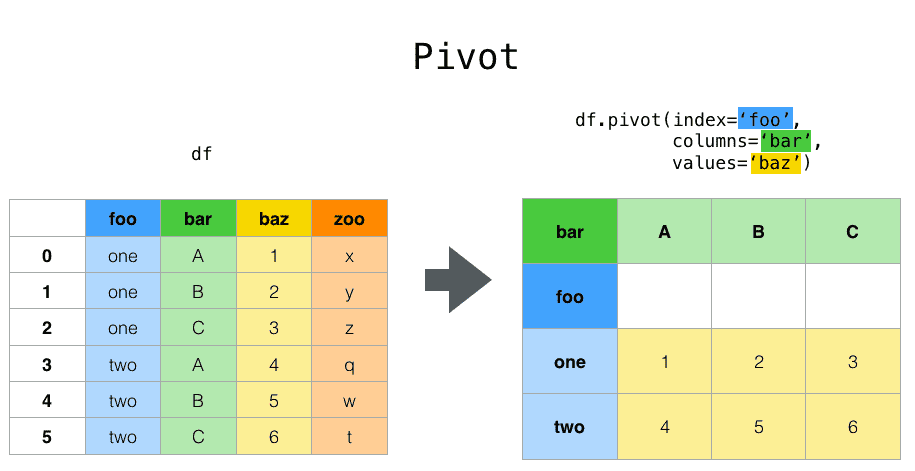

*  구글 colab에서 시각화 라이브러리(matplotlib, seaborn)을 사용하게 되면 한글 깨짐 현상 해결 방법

In [118]:
!sudo apt install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'sudo apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconf

In [119]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

**Plot 그리기**

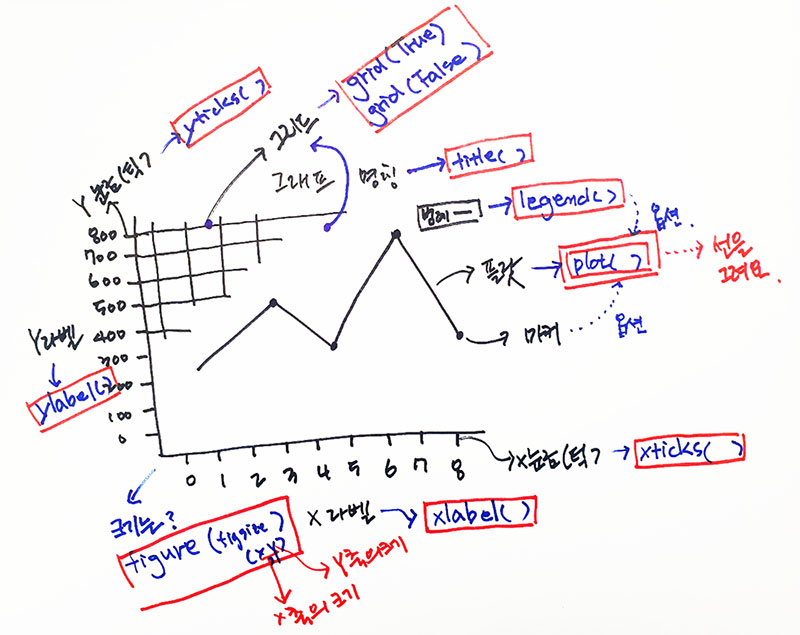

In [ ]:
ratio_df

,광역시도,시군구,MC수,인구수,MC비율
광역시도시군구,,,,,
경상북도 울릉군,경상북도,울릉군,1,9521,10.503098
전라남도 함평군,전라남도,함평군,2,32785,6.100351
강원도 정선군,강원도,정선군,2,37194,5.377211
인천광역시 옹진군,인천광역시,옹진군,1,20486,4.881382
강원도 양구군,강원도,양구군,1,22526,4.439315
...,...,...,...,...,...
대구광역시 달서구,대구광역시,달서구,1,568663,0.175851
서울특별시 송파구,서울특별시,송파구,1,676341,0.147854
경기도 화성시,경기도,화성시,1,818760,0.122136


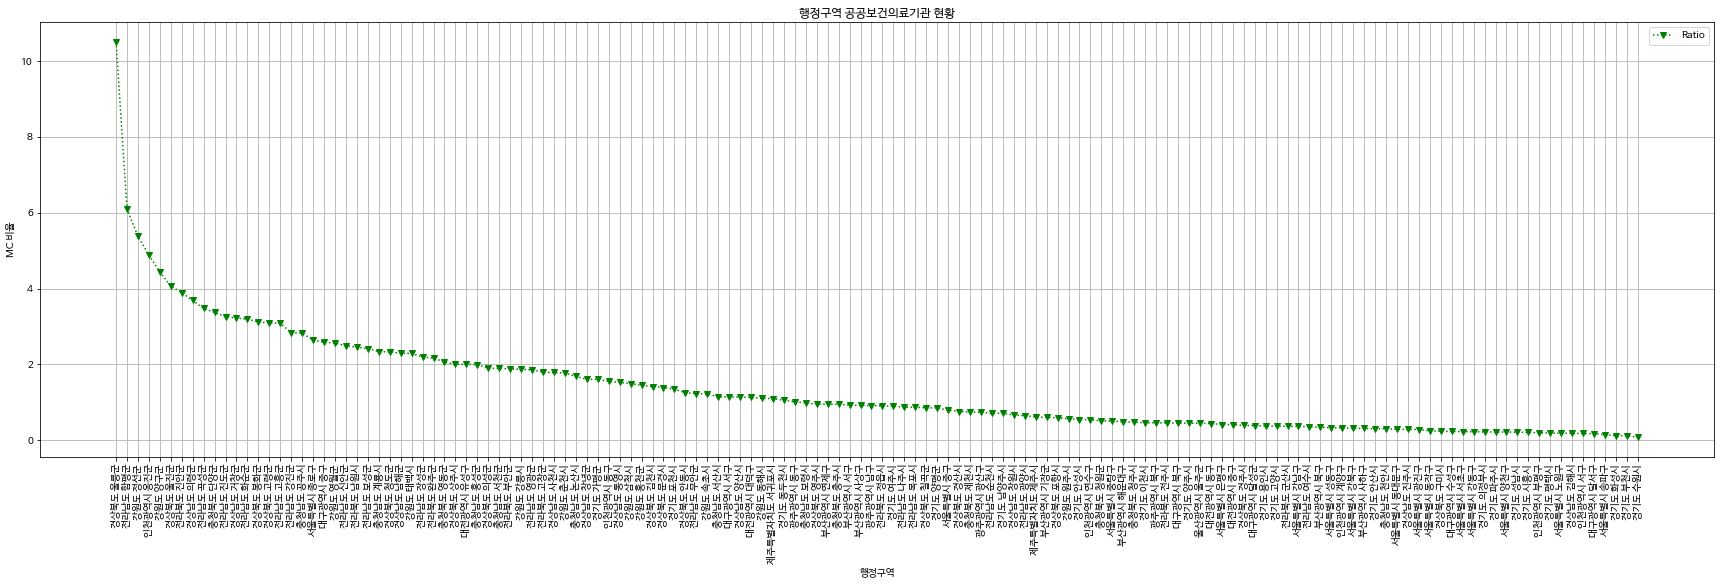

In [ ]:
x = ratio_df.index
y = ratio_df['MC비율']

plt.figure(figsize=(30, 8))
plt.plot(x, y, 'gv:', label='Ratio') # r= redo=circle - =  / bo-
plt.title("행정구역 공공보건의료기관 현황")
plt.legend()
plt.ylabel("MC 비율")
plt.xlabel("행정구역")
plt.xticks(x, rotation = 90)
plt.grid(True)
plt.show()

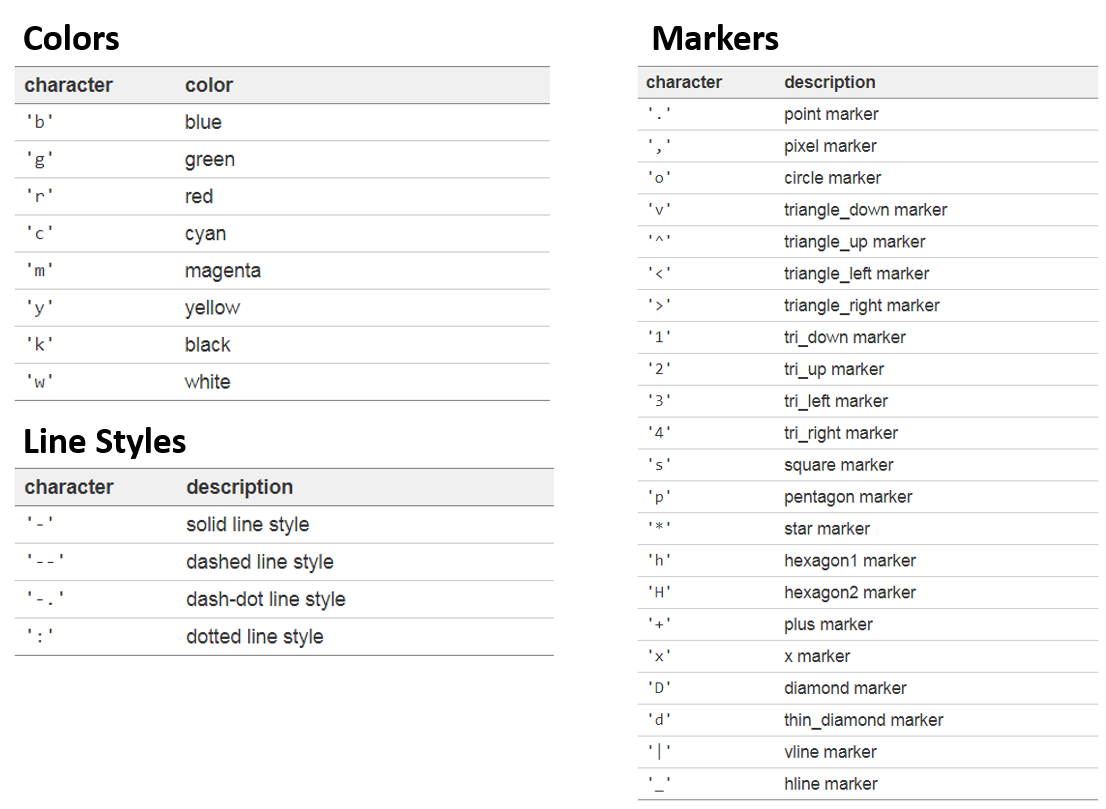

In [ ]:
ratio_df = ratio_df.sort_values(by=['MC비율'], ascending=False)

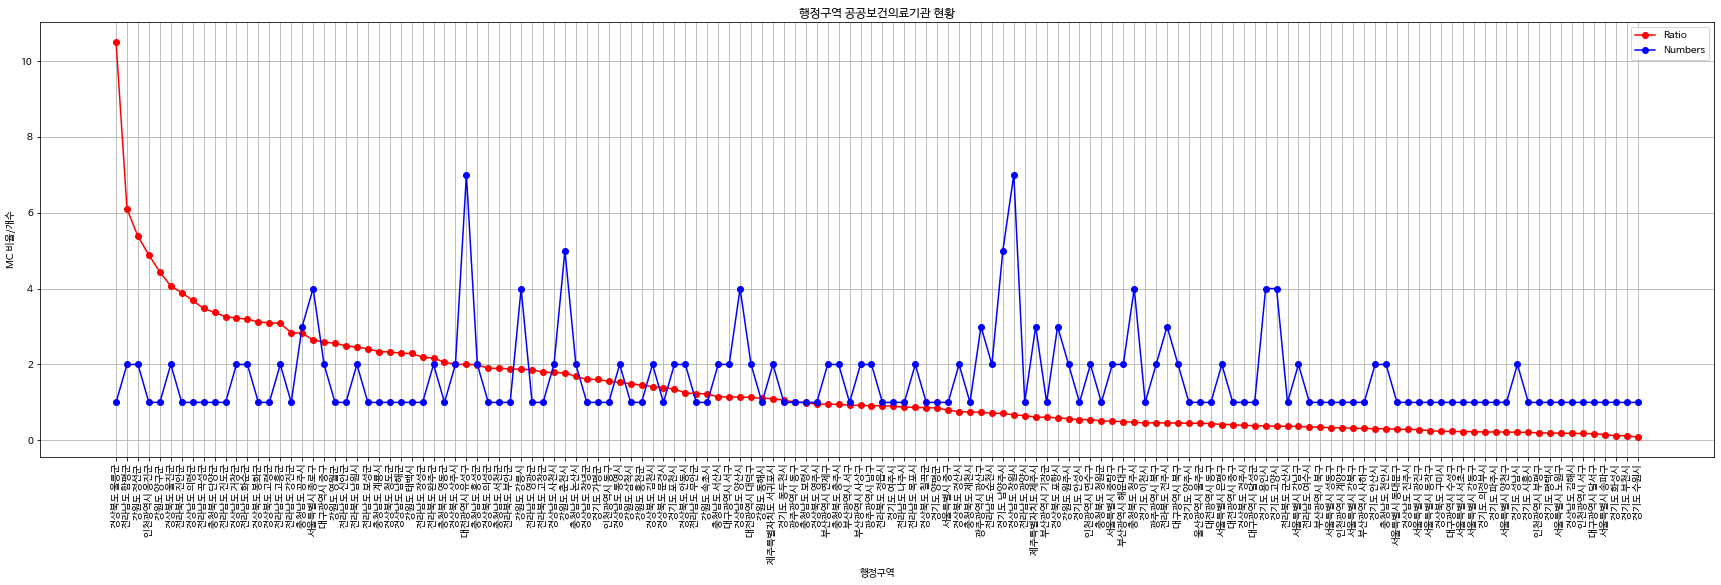

In [ ]:
x = ratio_df.index
y = ratio_df['MC비율']
y1 = ratio_df['MC수']
plt.figure(figsize=(30, 8))
plt.plot(x, y, 'ro-', label='Ratio')
plt.plot(x, y1, 'bo-', label='Numbers')
plt.title("행정구역 공공보건의료기관 현황")
plt.legend()
plt.ylabel("MC 비율/개수")
plt.xlabel("행정구역")
plt.xticks(x, rotation = 90)
plt.grid(True)
plt.show()

**Bar Chart 그리기**

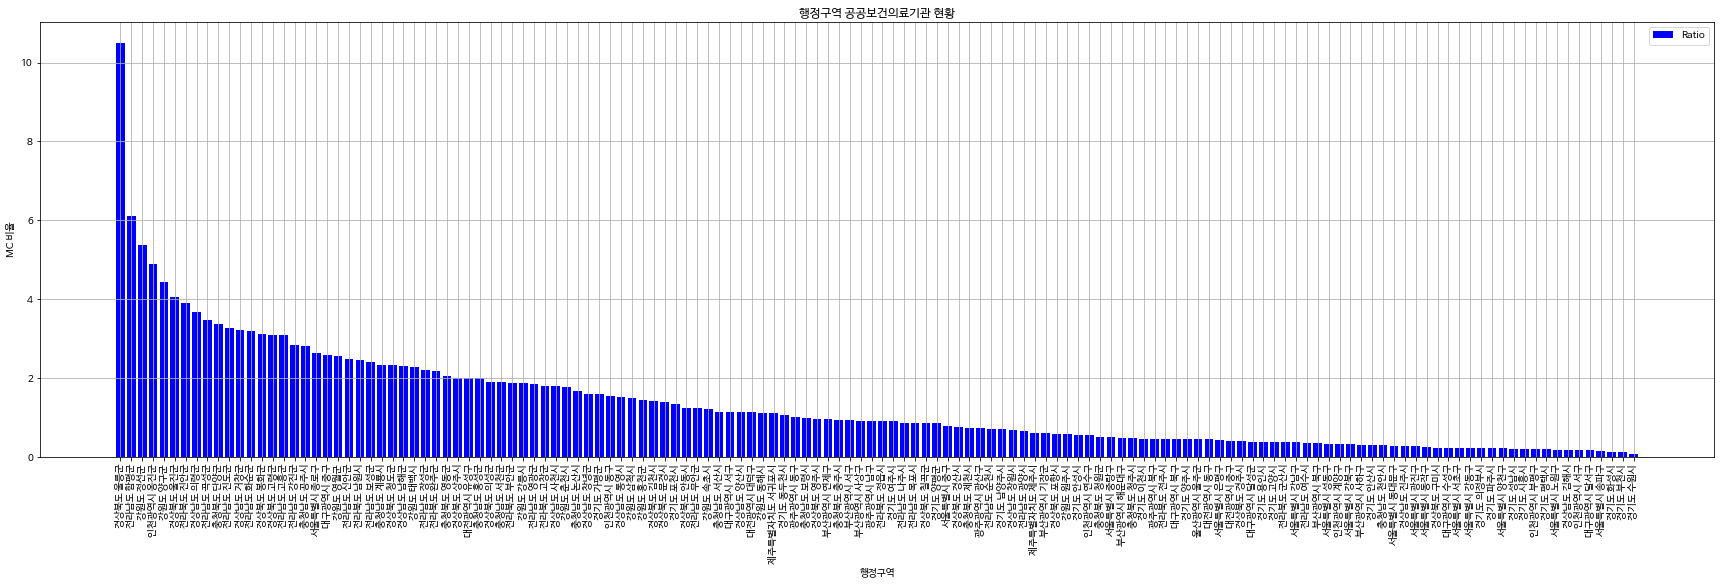

In [ ]:
x = ratio_df.index
y = ratio_df['MC비율']
plt.figure(figsize=(30, 8))
plt.bar(x, y, label='Ratio', color='#0000ff')
plt.title("행정구역 공공보건의료기관 현황")
plt.legend()
plt.ylabel("MC 비율")
plt.xlabel("행정구역")
plt.xticks(x, rotation = 90)
plt.grid(True)
plt.show()

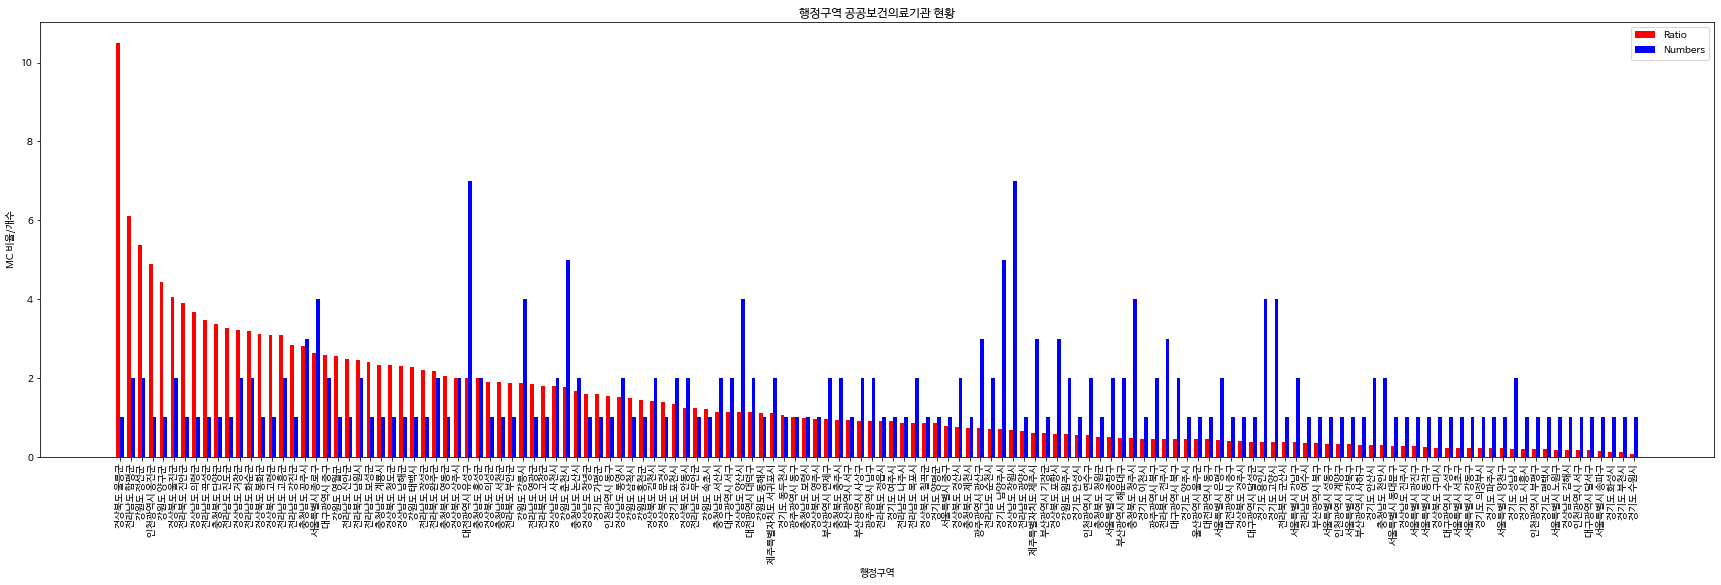

In [ ]:
import numpy as np

labels = ratio_df.index
x = np.arange(len(ratio_df.index))
#x = [n for n in range(len(ratio_df.index))]
y = ratio_df['MC비율']
y1 = ratio_df['MC수']
width = 0.35
plt.figure(figsize=(30, 8))
plt.bar(x-width/2, y, width, label='Ratio', color='#ff0000')
plt.bar(x+width/2, y1, width, label='Numbers', color='#0000ff')
plt.title("행정구역 공공보건의료기관 현황")
plt.legend()
plt.ylabel("MC 비율/개수")
plt.xlabel("행정구역")
plt.xticks(x, labels, rotation = 90)
plt.grid(False)
plt.show()

Numpy 패키지

In [ ]:
x = [n for n in range(len(ratio_df.index))]
y = x - 1
y

TypeError: ignored

In [ ]:
x = np.arange(len(ratio_df.index))
y = x - 1
y

array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 130, 131, 132, 133, 134, 135, 136, 137, 138])

**pcolor(), text(): 블록맵 그리기**

In [84]:
draw_korea = pd.read_csv(file_path + 'data_draw_korea.csv', index_col = 0 )

In [85]:
draw_korea

,인구수,shortName,x,y,면적,광역시도,행정구역
0,202520,강릉,11,4,1040.07,강원도,강릉시
1,25589,고성(강원),9,0,664.19,강원도,고성군
2,86747,동해,11,5,180.01,강원도,동해시
3,63986,삼척,11,8,1185.80,강원도,삼척시
4,76733,속초,9,1,105.25,강원도,속초시
...,...,...,...,...,...,...,...
224,127462,제천,8,10,882.47,충청북도,제천시
225,34480,증평,6,11,81.84,충청북도,증평군
226,62809,진천,5,11,406.08,충청북도,진천군
227,790216,청주,6,12,932.51,충청북도,청주시


In [86]:
draw_korea['광역시도시군구'] = draw_korea['광역시도'] + ' ' + draw_korea['행정구역']

In [87]:
draw_korea = draw_korea.set_index('광역시도시군구')

In [88]:
draw_korea

,인구수,shortName,x,y,면적,광역시도,행정구역
광역시도시군구,,,,,,,
강원도 강릉시,202520,강릉,11,4,1040.07,강원도,강릉시
강원도 고성군,25589,고성(강원),9,0,664.19,강원도,고성군
강원도 동해시,86747,동해,11,5,180.01,강원도,동해시
강원도 삼척시,63986,삼척,11,8,1185.80,강원도,삼척시
강원도 속초시,76733,속초,9,1,105.25,강원도,속초시
...,...,...,...,...,...,...,...
충청북도 제천시,127462,제천,8,10,882.47,충청북도,제천시
충청북도 증평군,34480,증평,6,11,81.84,충청북도,증평군
충청북도 진천군,62809,진천,5,11,406.08,충청북도,진천군


In [89]:
draw_korea_ratio_df = pd.merge(draw_korea, ratio_df, how='outer', left_index=True, right_index=True)

In [90]:
draw_korea_ratio_df

,인구수_x,shortName,x,y,면적,광역시도_x,행정구역,광역시도_y,시군구,MC수,인구수_y,MC비율
광역시도시군구,,,,,,,,,,,,
강원도 강릉시,202520.0,강릉,11.0,4.0,1040.07,강원도,강릉시,강원도,강릉시,4.0,213328.0,1.875047
강원도 고성군,25589.0,고성(강원),9.0,0.0,664.19,강원도,고성군,NaN,NaN,NaN,NaN,NaN
강원도 동해시,86747.0,동해,11.0,5.0,180.01,강원도,동해시,강원도,동해시,1.0,90417.0,1.105987
강원도 삼척시,63986.0,삼척,11.0,8.0,1185.80,강원도,삼척시,강원도,삼척시,1.0,66806.0,1.496872
강원도 속초시,76733.0,속초,9.0,1.0,105.25,강원도,속초시,강원도,속초시,1.0,81840.0,1.221896
...,...,...,...,...,...,...,...,...,...,...,...,...
충청북도 증평군,34480.0,증평,6.0,11.0,81.84,충청북도,증평군,NaN,NaN,NaN,NaN,NaN
충청북도 진천군,62809.0,진천,5.0,11.0,406.08,충청북도,진천군,NaN,NaN,NaN,NaN,NaN
충청북도 청원군,NaN,NaN,NaN,NaN,NaN,NaN,NaN,충청북도,청원군,1.0,195404.0,0.511760


In [92]:
draw_korea_ratio_df['인구수_x'].isnull().sum()

1

In [93]:
draw_korea_ratio_df[draw_korea_ratio_df['인구수_x'].isnull()]

,인구수_x,shortName,x,y,면적,광역시도_x,행정구역,광역시도_y,시군구,MC수,인구수_y,MC비율
광역시도시군구,,,,,,,,,,,,
충청북도 청원군,NaN,NaN,NaN,NaN,NaN,NaN,NaN,충청북도,청원군,1.0,195404.0,0.51176


In [94]:
draw_korea_ratio_df.loc['충청북도 청주시', '인구수_y'] = draw_korea_ratio_df.loc['충청북도 청주시', '인구수_y'] + draw_korea_ratio_df.loc['충청북도 청원군', '인구수_y']

In [95]:
draw_korea_ratio_df.loc['충청북도 청주시', 'MC수'] = draw_korea_ratio_df.loc['충청북도 청주시', 'MC수'] + draw_korea_ratio_df.loc['충청북도 청원군', 'MC수']

In [96]:
draw_korea_ratio_df.loc['충청북도 청주시', 'MC비율'] = draw_korea_ratio_df.loc['충청북도 청주시', 'MC수'] / draw_korea_ratio_df.loc['충청북도 청주시', '인구수_y'] *100000

In [97]:
draw_korea_ratio_df.drop('충청북도 청원군', axis=0, inplace=True)

In [98]:
df = draw_korea_ratio_df.copy()
df

,인구수_x,shortName,x,y,면적,광역시도_x,행정구역,광역시도_y,시군구,MC수,인구수_y,MC비율
광역시도시군구,,,,,,,,,,,,
강원도 강릉시,202520.0,강릉,11.0,4.0,1040.07,강원도,강릉시,강원도,강릉시,4.0,213328.0,1.875047
강원도 고성군,25589.0,고성(강원),9.0,0.0,664.19,강원도,고성군,NaN,NaN,NaN,NaN,NaN
강원도 동해시,86747.0,동해,11.0,5.0,180.01,강원도,동해시,강원도,동해시,1.0,90417.0,1.105987
강원도 삼척시,63986.0,삼척,11.0,8.0,1185.80,강원도,삼척시,강원도,삼척시,1.0,66806.0,1.496872
강원도 속초시,76733.0,속초,9.0,1.0,105.25,강원도,속초시,강원도,속초시,1.0,81840.0,1.221896
...,...,...,...,...,...,...,...,...,...,...,...,...
충청북도 제천시,127462.0,제천,8.0,10.0,882.47,충청북도,제천시,충청북도,제천시,1.0,134359.0,0.744275
충청북도 증평군,34480.0,증평,6.0,11.0,81.84,충청북도,증평군,NaN,NaN,NaN,NaN,NaN
충청북도 진천군,62809.0,진천,5.0,11.0,406.08,충청북도,진천군,NaN,NaN,NaN,NaN,NaN


In [99]:
df = df[['x', 'y', '광역시도_x',  '행정구역', 'MC수', '인구수_y', 'MC비율']].copy()

In [100]:
df

,x,y,광역시도_x,행정구역,MC수,인구수_y,MC비율
광역시도시군구,,,,,,,
강원도 강릉시,11.0,4.0,강원도,강릉시,4.0,213328.0,1.875047
강원도 고성군,9.0,0.0,강원도,고성군,NaN,NaN,NaN
강원도 동해시,11.0,5.0,강원도,동해시,1.0,90417.0,1.105987
강원도 삼척시,11.0,8.0,강원도,삼척시,1.0,66806.0,1.496872
강원도 속초시,9.0,1.0,강원도,속초시,1.0,81840.0,1.221896
...,...,...,...,...,...,...,...
충청북도 제천시,8.0,10.0,충청북도,제천시,1.0,134359.0,0.744275
충청북도 증평군,6.0,11.0,충청북도,증평군,NaN,NaN,NaN
충청북도 진천군,5.0,11.0,충청북도,진천군,NaN,NaN,NaN


In [101]:
df.rename(columns={'광역시도_x':'광역시도', '인구수_y':'인구수'}, inplace=True)

In [102]:
df

,x,y,광역시도,행정구역,MC수,인구수,MC비율
광역시도시군구,,,,,,,
강원도 강릉시,11.0,4.0,강원도,강릉시,4.0,213328.0,1.875047
강원도 고성군,9.0,0.0,강원도,고성군,NaN,NaN,NaN
강원도 동해시,11.0,5.0,강원도,동해시,1.0,90417.0,1.105987
강원도 삼척시,11.0,8.0,강원도,삼척시,1.0,66806.0,1.496872
강원도 속초시,9.0,1.0,강원도,속초시,1.0,81840.0,1.221896
...,...,...,...,...,...,...,...
충청북도 제천시,8.0,10.0,충청북도,제천시,1.0,134359.0,0.744275
충청북도 증평군,6.0,11.0,충청북도,증평군,NaN,NaN,NaN
충청북도 진천군,5.0,11.0,충청북도,진천군,NaN,NaN,NaN


In [107]:
mapData = df.pivot(index = 'y', columns = 'x', values = 'MC수')
mapData

x,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
y,,,,,,,,,,,,,,
0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2.0,1.0,NaN,NaN,NaN,NaN
2.0,NaN,NaN,NaN,1.0,4.0,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3.0,NaN,NaN,NaN,NaN,2.0,NaN,4.0,1.0,5.0,1.0,5.0,NaN,NaN,NaN
4.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0,1.0,2.0,NaN,1.0,4.0,NaN,NaN
5.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN
6.0,NaN,NaN,1.0,2.0,NaN,NaN,1.0,1.0,1.0,1.0,NaN,2.0,NaN,1.0
7.0,NaN,NaN,NaN,1.0,NaN,NaN,2.0,NaN,NaN,1.0,2.0,1.0,NaN,NaN
8.0,1.0,2.0,NaN,NaN,1.0,NaN,NaN,2.0,1.0,1.0,1.0,1.0,NaN,NaN


In [110]:
import numpy as np

maskedMapData = np.ma.masked_where(np.isnan(mapData), mapData)
maskedMapData

masked_array(
  data=[[--, --, --, --, --, --, --, --, 1.0, --, --, --, --, --],
        [--, --, --, --, --, --, 1.0, --, 2.0, 1.0, --, --, --, --],
        [--, --, --, 1.0, 4.0, 1.0, --, 1.0, 1.0, --, --, --, --, --],
        [--, --, --, --, 2.0, --, 4.0, 1.0, 5.0, 1.0, 5.0, --, --, --],
        [--, 1.0, 1.0, --, --, --, 1.0, 1.0, 2.0, --, 1.0, 4.0, --, --],
        [--, 1.0, 1.0, 1.0, 1.0, 1.0, --, 1.0, 1.0, --, --, 1.0, --, --],
        [--, --, 1.0, 2.0, --, --, 1.0, 1.0, 1.0, 1.0, --, 2.0, --, 1.0],
        [--, --, --, 1.0, --, --, 2.0, --, --, 1.0, 2.0, 1.0, --, --],
        [1.0, 2.0, --, --, 1.0, --, --, 2.0, 1.0, 1.0, 1.0, 1.0, --, --],
        [--, --, --, --, 2.0, 1.0, 1.0, 4.0, 2.0, --, 1.0, 1.0, 2.0, --],
        [--, 2.0, 2.0, --, 3.0, --, 2.0, 1.0, 1.0, 1.0, 2.0, --, --, --],
        [--, --, 1.0, --, --, --, --, --, 2.0, --, 1.0, --, 3.0, --],
        [--, --, --, 2.0, 1.0, 2.0, 5.0, --, --, 1.0, --, 2.0, 1.0, --],
        [--, --, 1.0, --, 7.0, 1.0, --, 1.0, 1.0, 

In [ ]:
def botherLine():
  BORDER_LINES = [
                  [(3, 2), (5, 2), (5, 3), (9, 3), (9, 1)], # 인천
                  [(2, 5), (3, 5), (3, 4), (8, 4), (8, 7), (7, 7), (7, 9), (4, 9), (4, 7), (1, 7)], # 서울
                  [(1, 6), (1, 9), (3, 9), (3, 10), (8, 10), (8, 9), (9, 9), (9, 8), (10, 8), (10, 5), (9, 5), (9, 3)], # 경기도
                  [(9, 12), (9, 10), (8, 10)], # 강원도
                  [(10, 5), (11, 5), (11, 4), (12, 4), (12, 5), (13, 5),(13, 4), (14, 4), (14, 2)], # 충청남도
                  [(11, 5), (12, 5), (12, 6), (15, 6), (15, 7), (13, 7),(13, 8), (11, 8), (11, 9), (10, 9), (10, 8)], # 충청북도
                  [(14, 4), (15, 4), (15, 6)], # 대전시
                  [(14, 7), (14, 9), (13, 9), (13, 11), (13, 13)], # 경상북도
                  [(14, 8), (16, 8), (16, 10), (15, 10),(15, 11), (14, 11), (14, 12), (13, 12)], # 대구시
                  [(15, 11), (16, 11), (16, 13)], # 울산시
                  [(17, 1), (17, 3), (18, 3), (18, 6), (15, 6)], # 전라북도
                  [(19, 2), (19, 4), (21, 4), (21, 3), (22, 3), (22, 2), (19, 2)], # 광주시
                  [(18, 5), (20, 5), (20, 6)], # 전라남도
                  [(16, 9), (18, 9), (18, 8), (19, 8), (19, 9), (20, 9), (20, 10)] # 부산시
                ]

  for path in BORDER_LINES:
      ys, xs = zip(*path)
      plt.plot(xs, ys, color='blue', lw=4)

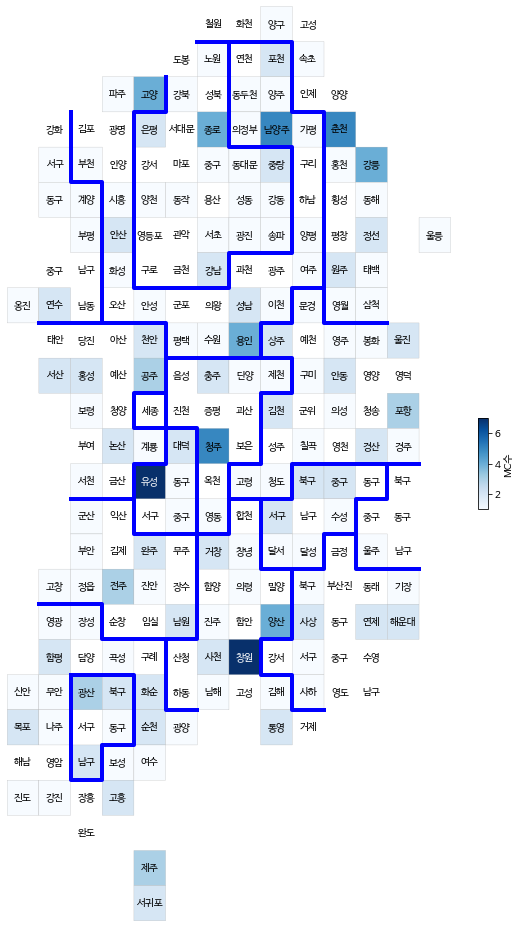

In [149]:
plt.figure(figsize=(8, 13))
plt.pcolor(maskedMapData, cmap = 'Blues', vmin = min(df['MC수']), vmax = max(df['MC수']), edgecolors='#aaaaaa')
plt.gca().invert_yaxis() # y축 기준으로 그래프 뒤집기

for idx, row in df.iterrows():
  if row['MC수'] >= 6:
    textColor = 'white'
  else:
    textColor = 'black'

  if len(row['행정구역']) > 2:
    name = row['행정구역'][:-1]
  else:
    name = row['행정구역']
  
  plt.text(row['x'] + 0.5, row['y'] + 0.5, name, verticalalignment='center', horizontalalignment='center', color = textColor)

botherLine()

plt.axis('off')
plt.tight_layout()

colorBar = plt.colorbar(shrink=0.1, aspect = 10)
colorBar.set_label('MC수')

plt.show()